# Multiple Linear Regression with Dummies 

Predicting the prices of houses based on certain factors or variables is a very good example where regression analysis can be made use of. 

In this mini project, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

Let us begin


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv('real_estate_price_size_year_view.csv')

In [3]:
raw_data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


##### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. We will create a dummy variable for view and include it in the regression

In [4]:
raw_data.describe(include='all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


## Create a dummy variable for 'view'

In [5]:
data = raw_data.copy()
data['view'] = data['view'].map({'Sea view': 1, 'No sea view': 0})

In [6]:
data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


## Create the regression

In [27]:
# Declare the dependent and the independent variables
y = data['price']
x1 = data[['size','view', 'year']]

### Regression

In [28]:
# we are using statsmodels so we need to create the constant ...
x = sm.add_constant(x1)

# before using the ordinary least squares (OLS) to carry out the regression
results = sm.OLS(y,x).fit()

# the summary gives us a result of the model
results.summary()

C:\Users\Liz Egbuchulam\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           1.02e-50
Time:                        23:25:37   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

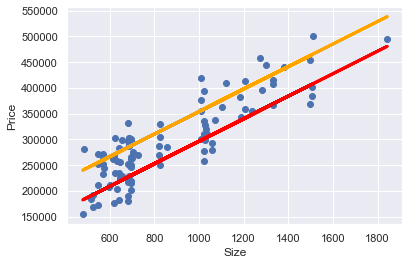

In [20]:
plt.scatter(data['size'], y)
yhat_1 = 77480 + 218.7521 * data['size'] # view = 0
yhat_2 = 135040 + 218.7521 * data['size'] # view = 1

plt.plot(data['size'], yhat_1, lw = 3, color = 'red')
plt.plot(data['size'], yhat_2, lw = 3, color = 'orange')

plt.xlabel('Size')
plt.ylabel('Price')

plt.show()



Text(0, 0.5, 'Price')

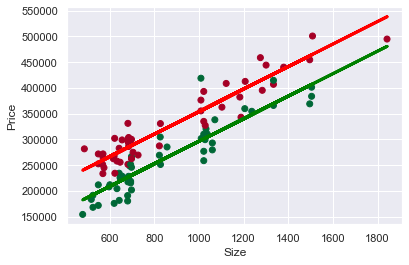

In [21]:
#let's add a heatmap of the data points
plt.scatter(data['size'], y, c = data['view'], cmap = 'RdYlGn_r')

yhat_no_sea = 77480 + 218.7521 * data['size'] # view = 0
yhat_sea = 135040 + 218.7521 * data['size'] # view = 1

plt.plot(data['size'], yhat_no_sea, lw = 3, color = 'green')
plt.plot(data['size'], yhat_sea, lw = 3, color = 'red')

plt.xlabel('Size')
plt.ylabel('Price')

### Let's add the original regression line without categorical variables

In [22]:
# define the variables
y = data['price']
x2 = data['size']

In [23]:
# add the constant
x_const = sm.add_constant(x2)

# the regression
reg = sm.OLS(y, x_const).fit()
reg.summary()

C:\Users\Liz Egbuchulam\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           8.13e-31
Time:                        23:24:55   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# therefore the original regression equation (without the dummy - view) is
yhat_ori = 101900 + 223.1787 * x2

Text(0, 0.5, 'Price')

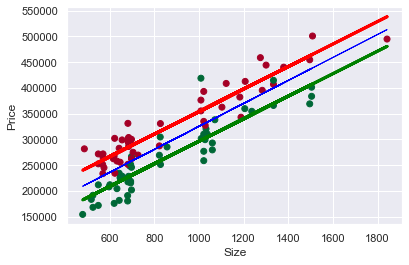

In [30]:
# plot the original regression along with the regression of the dummies
plt.scatter(data['size'], y, c = data['view'], cmap = 'RdYlGn_r')

yhat_no_sea = 77480 + 218.7521 * data['size'] # view = 0
yhat_sea = 135040 + 218.7521 * data['size'] # view = 1
yhat_ori = 101900 + 223.1787 * x2

plt.plot(data['size'], yhat_no_sea, lw = 3, color = 'green')
plt.plot(data['size'], yhat_sea, lw = 3, color = 'red')
plt.plot(data['size'], yhat_ori, lw = 1, color = 'blue')

plt.xlabel('Size')
plt.ylabel('Price')

### Let's do some prediction

In [35]:
# predict the prices of 2 houses built in 2018 and 2019 and having 
# no sea view and sea view respectively

# Note: it is vital that the input data we are using to predict its price 
# be in the same format as the training data set we used in training the model. 

new_data = pd.DataFrame({'const': 1.0, 'size': [1035, 732], 
                            'year': [2018, 2019], 'view': [0, 1]})

new_data

,const,size,year,view
0,1.0,1035,2018,0
1,1.0,732,2019,1


In [36]:
# using the model developed previously

prediction = results.predict(new_data)
prediction

0    1.093060e+08
1    1.092979e+08
dtype: float64

In [42]:
# let's put the result in a df
predictiondf = pd.DataFrame({'prediction': prediction})

# join the result with the prediction dataframe
joined_df = new_data.join(predictiondf)

joined_df

,const,size,year,view,prediction
0,1.0,1035,2018,0,1.093060e+08
1,1.0,732,2019,1,1.092979e+08
